<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>

#### <center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>


# USVP  2


In [1]:
# priprava pro Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Averaging over multiple images.

<center>
<img style="display: inline;" src="./cviceni_2/1.jpg" width="220px"/><img style="display: inline;" src="./cviceni_2/2.jpg" width="220px"/><img style="display: inline;" src="./cviceni_2/vys.jpg" width="220px"/><br />
<b>Figure 1</b> Example of averaging over multiple images. Inputs (left and middle image) and result (right image)  
</center>

In [2]:
import numpy as np
import skimage
import skimage.data
import matplotlib.pyplot as plt

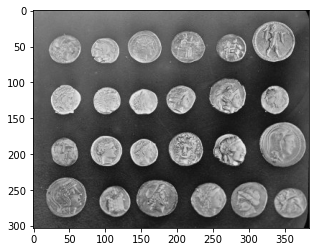

In [3]:
# Load image coins from skimage.data
img = skimage.data.coins()

# Matplotlib show image like matrix (numpy ndimage)
plt.imshow(img, cmap="gray") # colormap grayscale
plt.show() # nothing showed without this line

## Average filter

In [4]:
def avg_filter(img, size):
    """
        Function avg_filter

        Function applies average filter with defined size on the input image. 
        The function doesn't work with the img borders. 
        Thus, the new image is smaller than the input (new_img_size_x == img_size_x - floor(size/2), same for y)

        @param img input image
        @param size size of the avg filter. size == 3 + 2*k , k = 0,1,2,...  

    """
    if (size % 2) == 0:
        return None
    if (size == 1):
        return None
    h = (size // 2)
    output = np.zeros([img.shape[0]-(2*h), img.shape[1]-(2*h)])
    mask = np.ones([size,size]) * (1/(size*size))
    for y in range(h, img.shape[0] - h):
        for x in range(h, img.shape[1] - h):
            output[y - h, x -h] = np.sum(img[y-h:y+h+1,x-h:x+h+1] * mask)
    return output

### Example for filter size 3

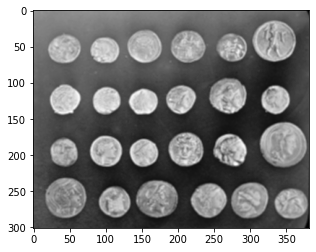

In [5]:
output = avg_filter(img, 3)

plt.imshow(output, cmap="gray") # colormap grayscale
plt.show() # nothing showed without this line

### Example for filter size 11

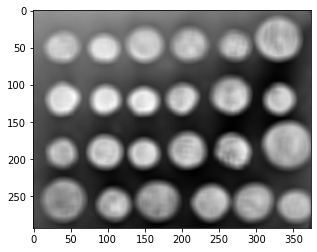

In [6]:
output = avg_filter(img, 11)

plt.imshow(output, cmap="gray") # colormap grayscale
plt.show()

## Median filter

In [7]:
def median_filter(img, size):
    """
        Median filter

        The function applies median filter of defined size on the input image. 
        Filter iteratively grabs parts of the image and search for the median value. 

        @param img input image
        @param size size of the filter 
    """
    h = (size // 2)
    output = np.zeros([img.shape[0]-(2*h), img.shape[1]-(2*h)])
    for y in range(h, img.shape[0] - h):
        for x in range(h, img.shape[1] - h):
            img_part = sorted(img[y-h:y+h+1,x-h:x+h+1].ravel())
            if (len(img_part) % 2) == 1:
                output[y - h, x -h] = img_part[(len(img_part) // 2)]
            else:
                output[y - h, x -h] = (img_part[(len(img_part) // 2) - 1] + img_part[(len(img_part) // 2)]) // 2                
    return output

### Example for filter size 11

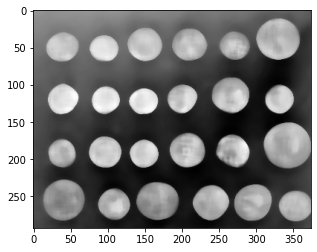

In [9]:
output = median_filter(img, 11)

plt.imshow(output, cmap="gray") # colormap grayscale
plt.show()

## Edge detection

In [8]:
def edge_detect(img, mask):
    """
        Function edge_detect

        Function applies mask in order to detect edges in the image. 

        @param img input image
        @param mask input mask of size == 3 + 2*k , k = 0,1,2,...  

    """
    if (mask.shape[0] != mask.shape[1]):
        return None
    if (mask.shape[0] % 2) == 0:
        return None
    if (mask.shape[0] == 1):
        return None
    h = (mask.shape[0] // 2)
    output = np.zeros([img.shape[0]-(2*h), img.shape[1]-(2*h)])
    for y in range(h, img.shape[0] - h):
        for x in range(h, img.shape[1] - h):
            output[y - h, x -h] = np.sum(img[y-h:y+h+1,x-h:x+h+1] * mask)
    return output

### Examples

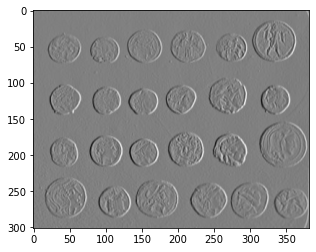

In [10]:
# Mask generation
mask = np.ones([3,3])
mask[:,1] = 0
mask[:,2] = -1

output = edge_detect(img, mask)

plt.imshow(output, cmap="gray") # colormap grayscale
plt.show()

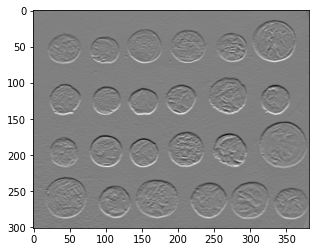

In [11]:
mask = mask.T

output = edge_detect(img, mask)

plt.imshow(output, cmap="gray") # colormap grayscale
plt.show()